# Лабораторна №2
## Гусак Владислав

Імпортуємо потрібні модулі та створюємо модель

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [125]:
def func(x0, epsi, delta, t):
    return (x0*epsi)/((epsi-delta*x0)*(np.e**(-epsi*t))+delta*x0)

Перевіряємо модель на прикладі з Рисунку 2 з файлу умови до лабораторної роботи.

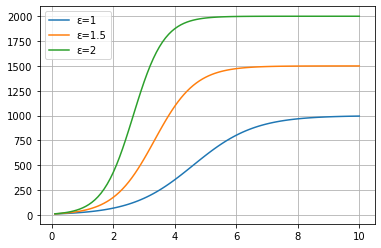

In [126]:
delta=0.001
x0=10
epsi=[1, 1.5, 2]
t=np.linspace(0.1, 10, 100)
fig, ax=plt.subplots()
ax.grid()
for eps in epsi:
    xt=func(x0, eps, delta, t)
    plt.plot(t, xt)
plt.legend(['\u03B5={}'.format(epsi[0]), '\u03B5={}'.format(epsi[1]), '\u03B5={}'.format(epsi[2])])

Графік відповідає наведеному на Рис. 2, приступаємо до виконання завдань лабораторної роботи

## Завдання №1

Будуємо графіки з різними $\varepsilon$

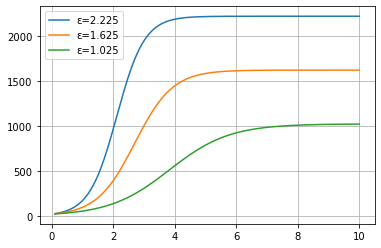

In [127]:
theta=0.1/4
epsi=[2.2+theta, 1.6+theta, 1+theta]
delta=0.001
x0=20-theta
t=np.linspace(0.1, 10, 1000)
fig, ax=plt.subplots()
ax.grid()
xk=[]
xst=[]
tk=[]
for eps in epsi:
    xt=func(x0, eps, delta, t)
    xst.append(eps/delta)
    xt12=(eps/delta)/2
    xk.append(xt12)
    df=pd.DataFrame(xt,t)
    l=[]
    for i in df.itertuples():
        if i[1]>xt12-10 and i[1]<xt12+10:
            l.append(i[0])
    tk.append(np.mean(l))
    plt.plot(t, xt)
plt.legend(['\u03B5={}'.format(epsi[0]), '\u03B5={}'.format(epsi[1]), '\u03B5={}'.format(epsi[2])])

In [128]:
xk

[1112.5, 812.5, 512.5]

In [129]:
tk

[2.116666666666667, 2.6963963963963966, 3.821171171171172]

In [130]:
xst

[2225.0, 1625.0, 1025.0]

## Завдання №2

Будуємо графіки з різними $\delta$

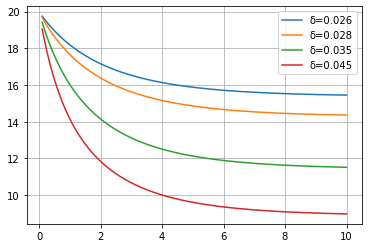

In [131]:
theta=0.1/4
epsi=0.4
delta=[0.001+theta, 0.003+theta, 0.01+theta, 0.02+theta]
x0=20-theta
t=np.linspace(0.1, 10, 1000)
fig, ax=plt.subplots()
ax.grid()
xk=[]
xst=[]
tk=[]
for delt in delta:
    xt=func(x0, epsi, delt, t)
    xst.append(epsi/delt)
    xt12=np.mean(xt)
    xk.append(xt12)
    df=pd.DataFrame(xt,t)
    l=[]
    for i in df.itertuples():
        if i[1]>xt12-0.01 and i[1]<xt12+0.01:
            l.append(i[0])
    tk.append(np.mean(l))
    plt.plot(t, xt)
plt.legend(['\u03B4={:.3f}'.format(delta[0]), '\u03B4={}'.format(delta[1]), '\u03B4={}'.format(delta[2]), '\u03B4={}'.format(delta[3])])

In [132]:
tk

[3.4297297297297304, 3.3801801801801807, 3.2513513513513517, 3.112612612612613]

In [133]:
xst

[15.384615384615383, 14.285714285714286, 11.428571428571429, 8.88888888888889]

In [134]:
xk

[16.338728182176794,
 15.421856866926747,
 12.936435409597788,
 10.579688570739167]

## Завдання №3

Будуємо графіки з різними $x_{0}$

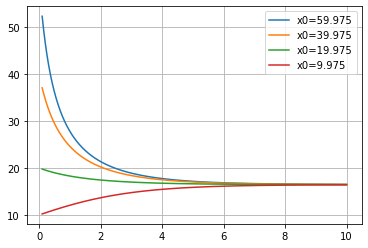

In [163]:
theta=0.1/4
epsi=0.6-theta
delta=0.01+theta
x=[60-theta, 40-theta, 20-theta, 10-theta]
t=np.linspace(0.1, 10, 1000)
fig, ax=plt.subplots()
ax.grid()
xk=[]
xst=[]
tk=[]
for x0 in x:
    xt=func(x0, epsi, delta, t)
    xst.append(epsi/delta)
    xt12=max(xt)/2
    xk.append(xt12)
    df=pd.DataFrame(xt,t)
    l=[]
    for i in df.itertuples():
        if i[1]>xt12-0.1 and i[1]<xt12+0.1:
            l.append(i[0])
    tk.append(np.mean(l))
    plt.plot(t, xt)
plt.legend(['x0={:.3f}'.format(x[0]), 'x0={:.3f}'.format(x[1]), 'x0={:.3f}'.format(x[2]), 'x0={:.3f}'.format(x[3])])

In [165]:
tk

[1.1653153153153155, 2.884684684684685, 1.8545464646546, 1.52465846846846]

In [156]:
xk

[26.11893489384617, 18.50543817075436, 9.868462819604067, 8.19740579442933]

In [158]:
xst

[16.428571428571427,
 16.428571428571427,
 16.428571428571427,
 16.428571428571427]

Будуємо графіки $x_{ст}(\varepsilon)$, $x_{ст}(\delta)$

Text(0.5, 0, 'ε')

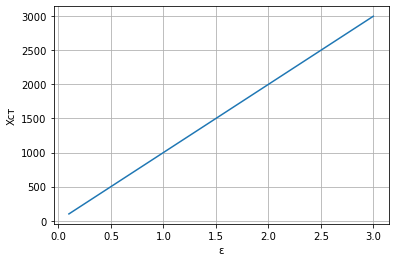

In [9]:
epsi=np.linspace(0.1, 3, 100)
delta=0.001
xst=epsi/delta
fig, ax=plt.subplots()
ax.grid()
plt.plot(epsi, xst)
plt.ylabel('Xст')
plt.xlabel('\u03B5')

Text(0.5, 0, 'δ')

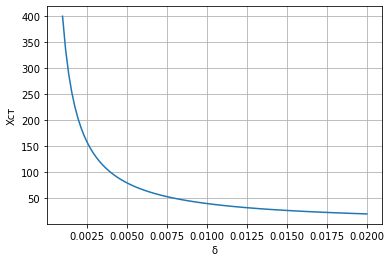

In [102]:
epsi=0.4
delta=np.linspace(0.001, 0.02, 100)
xst=epsi/delta
fig, ax=plt.subplots()
ax.grid()
plt.plot(delta, xst)
plt.ylabel('Xст')
plt.xlabel('\u03B4')

Будуємо спільний графік для $x_{ст}(\varepsilon)$, $x_{ст}(\delta)$

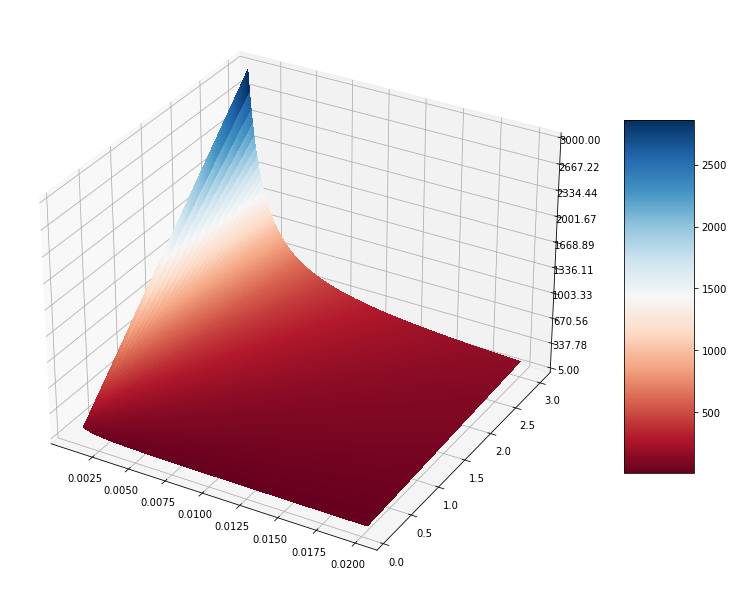

In [105]:
delta=np.linspace(0.001, 0.02, 200)
epsi=np.linspace(0.1, 3, 200)
def func(X0, epsi):
    xst=epsi/delta
    return xst
X,Y = np.meshgrid(delta, epsi)
Z=func(X,Y)
fig = plt.figure(figsize=(13,13))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Будуємо графіки $T_{0.9}(x_{0})$, $T_{0.9}(\varepsilon)$, $T_{0.9}(\delta)$

Text(0.5, 0, '$x_{0}$')

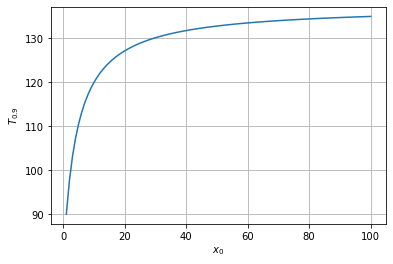

In [12]:
delta=np.linspace(0.001, 0.02, 100)
epsi=np.linspace(0.1, 3, 100)
x0=np.linspace(1, 100, 100)
T09=0.9*(epsi/delta)
fig, ax=plt.subplots()
ax.grid()
plt.plot(x0, T09)
plt.ylabel('$T_{0.9}$')
plt.xlabel('$x_{0}$')

Text(0.5, 0, 'ε')

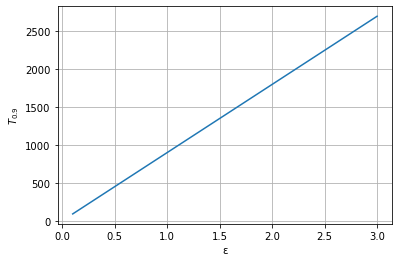

In [13]:
delta=0.001
epsi=np.linspace(0.1, 3, 100)
T09=0.9*(epsi/delta)
fig, ax=plt.subplots()
ax.grid()
plt.plot(epsi, T09)
plt.ylabel('$T_{0.9}$')
plt.xlabel('\u03B5')

Text(0.5, 0, 'δ')

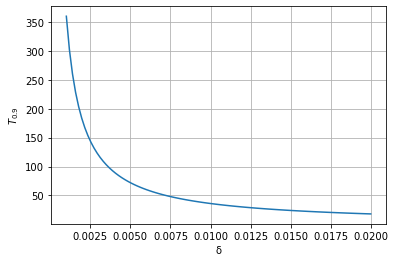

In [14]:
epsi=0.4
delta=np.linspace(0.001, 0.02, 100)
T09=0.9*(epsi/delta)
fig, ax=plt.subplots()
ax.grid()
plt.plot(delta, T09)
plt.ylabel('$T_{0.9}$')
plt.xlabel('\u03B4')

Будуємо графіки $x_{k}(\varepsilon)$, $x_{k}(\delta)$, $x_{k}(x_{0})$, $t_{k}(\varepsilon)$, $t_{k}(\delta)$, $t_{k}(x_{0})$

Text(0.5, 0, 'ε')

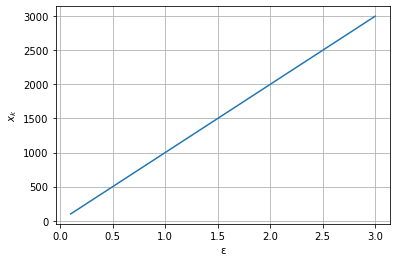

In [122]:
delta=0.001
epsi=np.linspace(0.1, 3, 100)
xk=epsi/delta
fig, ax=plt.subplots()
ax.grid()
plt.plot(epsi, xk)
plt.ylabel('$x_{k}$')
plt.xlabel('\u03B5')

Text(0.5, 0, 'δ')

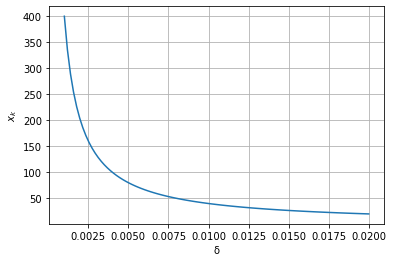

In [121]:
epsi=0.4
delta=np.linspace(0.001, 0.02, 100)
xk=epsi/delta
fig, ax=plt.subplots()
ax.grid()
plt.plot(delta, xk)
plt.ylabel('$x_{k}$')
plt.xlabel('\u03B4')

Text(0.5, 0, '$x_{0}$')

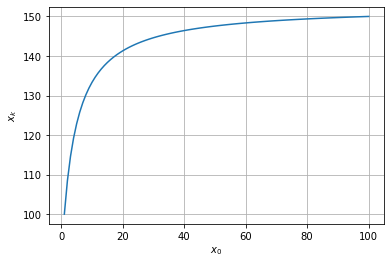

In [120]:
delta=np.linspace(0.001, 0.02, 100)
epsi=np.linspace(0.1, 3, 100)
x0=np.linspace(1, 100, 100)
xk=epsi/delta
fig, ax=plt.subplots()
ax.grid()
plt.plot(x0, xk)
plt.ylabel('$x_{k}$')
plt.xlabel('$x_{0}$')

In [111]:
def t_func(x0, epsi, delta, x):
    return (np.log((((x0*epsi)/x)-(delta*x0))/(epsi-delta*x0)))/(-epsi)

Text(0.5, 0, 'ε')

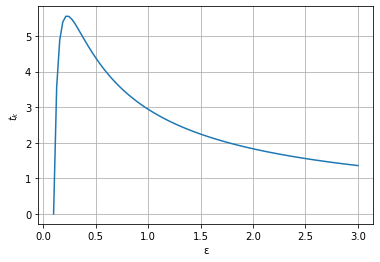

In [117]:
epsi=np.linspace(0.1, 3, 100)
delta=0.001
x0=50
x=epsi/(2*delta)
t=t_func(x0, epsi, delta, x)
fig, ax=plt.subplots()
ax.grid()
plt.plot(epsi, t)
plt.ylabel('$t_{k}$')
plt.xlabel('\u03B5')

Text(0.5, 0, 'δ')

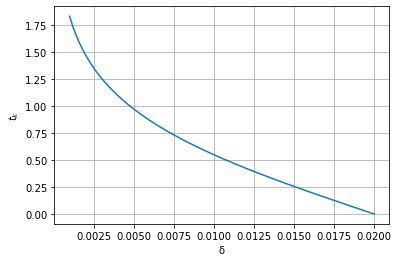

In [113]:
delta=np.linspace(0.001, 0.02, 100)
epsi=2
x0=50
x=epsi/(2*delta)
t=t_func(x0, epsi, delta, x)
fig, ax=plt.subplots()
ax.grid()
plt.plot(delta, t)
plt.ylabel('$t_{k}$')
plt.xlabel('\u03B4')

Text(0.5, 0, '$x_{0}$')

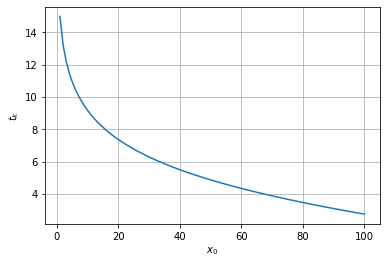

In [116]:
epsi=0.4
delta=0.001
x0=np.linspace(1, 100, 100)
x=epsi/(2*delta)
t=t_func(x0, epsi, delta, x)
fig, ax=plt.subplots()
ax.grid()
plt.plot(x0, t)
plt.ylabel('$t_{k}$')
plt.xlabel('$x_{0}$')

## Висновки
Виконавши лабораторну роботу навчилися будувати і аналізувати моделі зміни чисельності особин в популяціях при внурішній конкуренції між особинами в популяції. Провели дослідження впливу ріних факторів на поведінку популяції під час вищезазначених процесів.